In [2]:
# 網路爬蟲
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import re
import datetime

In [3]:
# 讀取URL(以google趨勢為)
url='https://news.google.com/topics/CAAqJQgKIh9DQkFTRVFvSUwyMHZNR3QwTlRFU0JYcG9MVlJYS0FBUAE?hl=zh-TW&gl=TW&ceid=TW%3Azh-Hant'
r=requests.get(url)
# 網頁內容
url_headers={'user-agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'}
r=requests.get(url,headers=url_headers)
web_content=r.text
print(web_content)
soup = BeautifulSoup(web_content,'lxml')

<!doctype html><html lang="zh" dir="ltr"><head><base href="https://news.google.com/"><meta name="referrer" content="origin"><link rel="canonical" href="https://news.google.com/topics/CAAqJQgKIh9DQkFTRVFvSUwyMHZNR3QwTlRFU0JYcG9MVlJYS0FBUAE"><meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui"><meta name="google-site-verification" content="AcBy5YFny2HQgVUCR18tO5YUTf6MpVlcJqGTd-a9-SI"><meta name="mobile-web-app-capable" content="yes"><meta name="apple-mobile-web-app-capable" content="yes"><meta name="application-name" content="新聞"><meta name="apple-mobile-web-app-title" content="新聞"><meta name="apple-mobile-web-app-status-bar-style" content="black"><meta name="theme-color" content="white"><meta name="msapplication-tap-highlight" content="no"><link rel="shortcut icon" href="https://lh3.googleusercontent.com/-DR60l-K8vnyi99NZovm9HlXyZwQ85GMDxiwJWzoasZYCUrPuUM_P_4Rb7ei03j-0nRs0c4F=w16" sizes="16x16"><link rel="shortcut icon" href="https://lh3.googleusercontent.com/-D

In [4]:
#所有文章標題區塊
titles = soup.find_all('a', class_='DY5T1d')
#print(type(titles))
#列印所有文章標題(儲存成list)
list_title=[]
for i in range(len(titles)):
    list_title.append(titles[i].text)
print(list_title)
print(len(titles))

['四價細胞型疫苗 9、10月進到台灣 對蛋過敏者可施打', '四價流感疫苗生力軍 細胞培養病毒效果好但貴1.5倍', '不實醫美廣告 北市1-4月開罰700萬', '法國婦人腦炎病逝傳科學家新冠檢測發現全新病毒懷疑經蚊蟲傳播- 健康百科', '吃一顆粽子的熱量，要跑8公里才能消耗完！營養師提供健康粽食譜，這樣吃就對了', '一餐吃十幾塊蘿蔔糕，血糖就意外飆高…營養師4大建議，吃東西真的要謹慎啊！', '喝酒都不會臉紅的人，代表肝功能很好？醫生打臉：灌了好幾杯還「面不改色」才要小心！', '台灣的兒童竟然是亞洲最胖！專家提醒：小孩飲食觀念差，小心得這10種病', '為何專家會說「咳嗽用手遮住嘴巴」是錯誤行為？尋常動作其實危機四伏啊…', '幾乎所有失智症患者都有的8大前兆！醫生說的請記牢，符合2項就得小心了…', '立院三讀通過 愛滋病患將可器捐其他帶原者', '你還在用塑膠袋裝熱湯嗎？小心！塑化劑已下肚', '愛喝熱茶、熱湯會得食道癌？科學家澄清：喝太燙是其次，有「這2個」壞習慣才是罹癌關鍵', '消毒傷口該用生理食鹽水、優碘或白藥水？皮膚科醫師外傷處理SOP，你我都該有點概念', '有肌腱炎、網球肘，老是這裡痠那裡痛怎麼辦？現在用這種療法，讓你不用再打針吃藥', '男性更年期同樣讓人崩潰！50歲上下都得注意，醫師3招緩解情緒不穩、早洩問題', '日本「德國麻疹」病例創新高！東京、千葉疫情升溫 育齡女性赴日旅遊要注意', '致力病毒防疫研究 長庚大學施信如獲王民寧獎殊榮', '酸痛貼布不是貼越久越快康復！貼太久反害皮膚爛掉，專家：貼這時間已是極限', '曾肆虐美國，今入侵台灣 腸病毒D68型恐形成嚴重呼吸道感染與肢體麻痺', '沒食鹽水，隱形眼鏡放水裡保存可以嗎？眼科醫師嚇傻眼7大錯誤觀念，千萬要改', '包皮一定要割嗎？會不會影響性能力？醫生建議：這4種情況沒割掉，小心會「害人害己」', '想舒緩全身痠痛，熱敷還是冰敷才有效？別猜了，運動醫學專家給出正確答案…', '指甲狀態其實暗藏健康密碼？出現這種顏色的指甲，小心是癌症上身', '一下便祕一下腹瀉，腸道總是鬧不停？醫生：恐怕是這種病，有4種食物千萬別吃', '別再羨慕別人了！讀讀莊子8則寓言，你擁有的一切，價值或許遠超出你想像…', '家中有血糖高、糖尿病患，年夜飯都吃得戰戰兢兢…醫師澄清：其實「這類」食物不

In [7]:
#對應文章的網址
urls = soup.find_all('a', class_='VDXfz')
url_list=[]
for i in range(len(urls)):
    url=urls[i].get('href').replace('.','https://news.google.com',1)
    url_list.append(url)
print(url_list)
print(len(urls))
# newUrls=[]
# newUrls.clear()
# newUrls = [requests.get(t.find('a')['href'].replace('.','https://news.google.com',1)).url for t in titles]


['https://news.google.com/articles/CAIiEAFBvbTRt8FnsvIPYvzU9TYqGQgEKhAIACoHCAowk7j0CjCY4qIDMKXQvgY?hl=zh-TW&gl=TW&ceid=TW%3Azh-Hant', 'https://news.google.com/articles/CBMiJ2h0dHBzOi8vdWRuLmNvbS9uZXdzL3N0b3J5LzcyNjYvNDY2OTI3MNIBK2h0dHBzOi8vdWRuLmNvbS9uZXdzL2FtcC9zdG9yeS83MjY2LzQ2NjkyNzA?hl=zh-TW&gl=TW&ceid=TW%3Azh-Hant', 'https://news.google.com/articles/CBMiJWh0dHBzOi8vd3d3LnN0b3JtLm1nL2xpZmVzdHlsZS8xMjE4NDXSASZodHRwczovL3d3dy5zdG9ybS5tZy9hbXBhcnRpY2xlLzEyMTg0NQ?hl=zh-TW&gl=TW&ceid=TW%3Azh-Hant', 'https://news.google.com/articles/CBMi9gFodHRwczovL3d3dy5oZWFsdGh5ZC5jb20vYXJ0aWNsZXMvYm9keS8lRTYlQjMlOTUlRTUlOUMlOEIlRTUlQTklQTYlRTQlQkElQkElRTglODUlQTYlRTclODIlOEUlRTclOTclODUlRTklODAlOUQtJUU1JTgyJUIzJUU3JUE3JTkxJUU1JUFEJUI4JUU1JUFFJUI2JUU2JTk2JUIwJUU1JTg2JUEwJUU2JUFBJUEyJUU2JUI4JUFDJUU3JTk5JUJDJUU3JThGJUJFJUU1JTg1JUE4JUU2JTk2JUIwJUU3JTk3JTg1JUU2JUFGJTkyP3JlZj1obWHSAQA?hl=zh-TW&gl=TW&ceid=TW%3Azh-Hant', 'https://news.google.com/articles/CBMiJWh0dHBzOi8vd3d3LnN0b3JtLm1nL2xpZmVzdHlsZS8yNzExNT

In [8]:
df=pd.DataFrame(
{
    'title':list_title,
    'links':url_list
})

df

,links,title
0,https://news.google.com/articles/CAIiEAFBvbTRt...,四價細胞型疫苗 9、10月進到台灣 對蛋過敏者可施打
1,https://news.google.com/articles/CBMiJ2h0dHBzO...,四價流感疫苗生力軍 細胞培養病毒效果好但貴1.5倍
2,https://news.google.com/articles/CBMiJWh0dHBzO...,不實醫美廣告 北市1-4月開罰700萬
3,https://news.google.com/articles/CBMi9gFodHRwc...,法國婦人腦炎病逝傳科學家新冠檢測發現全新病毒懷疑經蚊蟲傳播- 健康百科
4,https://news.google.com/articles/CBMiJWh0dHBzO...,吃一顆粽子的熱量，要跑8公里才能消耗完！營養師提供健康粽食譜，這樣吃就對了
5,https://news.google.com/articles/CBMiJWh0dHBzO...,一餐吃十幾塊蘿蔔糕，血糖就意外飆高…營養師4大建議，吃東西真的要謹慎啊！
6,https://news.google.com/articles/CBMiJWh0dHBzO...,喝酒都不會臉紅的人，代表肝功能很好？醫生打臉：灌了好幾杯還「面不改色」才要小心！
7,https://news.google.com/articles/CBMiJWh0dHBzO...,台灣的兒童竟然是亞洲最胖！專家提醒：小孩飲食觀念差，小心得這10種病
8,https://news.google.com/articles/CBMiJWh0dHBzO...,為何專家會說「咳嗽用手遮住嘴巴」是錯誤行為？尋常動作其實危機四伏啊…
9,https://news.google.com/articles/CBMiJWh0dHBzO...,幾乎所有失智症患者都有的8大前兆！醫生說的請記牢，符合2項就得小心了…


In [37]:
#個別文章分析
url = df['links'][4] #取得第一篇文章的連結
print(url)
#爬此文章內容
r = requests.get(url)
web_content = r.text
soup = BeautifulSoup(web_content,'lxml')
print(web_content)

https://news.google.com/articles/CBMiJWh0dHBzOi8vd3d3LnN0b3JtLm1nL2xpZmVzdHlsZS8yNzExNTHSASZodHRwczovL3d3dy5zdG9ybS5tZy9hbXBhcnRpY2xlLzI3MTE1MQ?hl=zh-TW&gl=TW&ceid=TW%3Azh-Hant
<!DOCTYPE html>
<html lang="zh-TW">
<head>
	<meta http-equiv="X-UA-Compatible" content="IE=edge">
	<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
	<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0">
	<meta name="author" content="Storm.mg">
	<meta name="google-site-verification" content="gWQwIYn3i8TevSeZQBLN9olddyYM0pCRg33Rgdz4bGk" />
	<meta property="fb:app_id" content="917307478388825" />
	<meta name="csrf-token" content="aTxBwyb4Ged73ixes9GmLNe6qczk8fjVwNooibtL">
		<title>吃一顆粽子的熱量，要跑8公里才能消耗完！營養師提供健康粽食譜，這樣吃就對了-風傳媒</title>
<link rel="canonical" href='https://www.storm.mg/lifestyle/271151' />
<link href='https://image.cache.storm.mg/styles/smg-800x533-fp/s3/media/image/2017/05/23/20170523-031638_U7418_M282925_9c19.jpg?itok=Ai9t2xRm' rel="imag

In [38]:
#擷取文章內容
article_content=soup.find_all('article')
article_content
# print(article_content[0].text)
# print(type(article_content[0].text)) #型態為字串

[<article>
 <div class="article_content_inner" font="size_0" id="CMS_wrapper" itemprop="articleBody">
 <blockquote>
 <p aid="61">每到端午節，國人習慣吃粽子應景，但你可知道粽子熱量有多高嗎？有人喜歡吃北部粽，有的人則偏愛南部粽。營養師高欣農分析，南北部粽子其實熱量差不多，吃一顆約500大卡，要慢跑8公里才能完全消耗。</p>
 </blockquote>
 <h3 class="subtitle3">一顆粽子約500大卡</h3>
 <p aid="62">營養師高欣農指出，坊間南北粽的料理烹調不同，但熱量差不多。北部粽是將糯米炒過，包入豬肉、鹹蛋黃、花生等蒸熟，熱量約在500多大卡；而南部粽則先以生糯米混合豬肉、花生、鹹蛋黃等食材，再放進水中煮熟，熱量也將近500大卡。</p>
 <h3 class="subtitle3">慢跑8公里才能消耗</h3>
 <p aid="63">高欣農營養師表示，吃下一顆粽子相當於一餐的熱量，且鈉含量也頗高，添加醬料應酌量，建議一餐以一顆為限，吃粽子應景、解饞即可；若要完全消耗熱量，必須騎自行車20公里，或快走9公里，或是慢跑8公里。</p>
 <h3 class="subtitle3">食材替換　自製健康低卡粽</h3>
 <p aid="64">高欣農營養師提供低卡健康粽食譜，將五花肉替換成豬後腿肉、栗子取代鹹蛋黃，以及新鮮筍子取代花生，熱量至少能夠降低一半以上，僅約200多大卡，另外，吃粽子也建議搭配蔬果，加速食物消化，才不容易胃脹氣。</p>
 <p aid="65">本文經授權轉載自<a href="http://www.healthnews.com.tw/news/article/33031/%E7%B2%BD%E5%AD%90%E7%86%B1%E9%87%8F%E9%AB%98%E3%80%80%E5%90%83%E4%B8%80%E9%A1%86%E8%A6%81%E8%B7%918%E5%85%AC%E9%87%8C" target="_blank">健康醫療網</a>（原標題：粽子熱量高　吃一顆要跑8公里）</p>
 <p aid="66">責任編輯 / 林安儒</p>
 </div

In [39]:
# 將所有tag p中的text取出並放進list。
article = []
for p in article_content:
    article.append(p.text)

#將list中的text元素join合併成一個字串，並以特殊字元’\n’來間隔 (主要是印出好看用)
articleAll = '\n'.join(article)
print(articleAll)
c = articleAll 




每到端午節，國人習慣吃粽子應景，但你可知道粽子熱量有多高嗎？有人喜歡吃北部粽，有的人則偏愛南部粽。營養師高欣農分析，南北部粽子其實熱量差不多，吃一顆約500大卡，要慢跑8公里才能完全消耗。

一顆粽子約500大卡
營養師高欣農指出，坊間南北粽的料理烹調不同，但熱量差不多。北部粽是將糯米炒過，包入豬肉、鹹蛋黃、花生等蒸熟，熱量約在500多大卡；而南部粽則先以生糯米混合豬肉、花生、鹹蛋黃等食材，再放進水中煮熟，熱量也將近500大卡。
慢跑8公里才能消耗
高欣農營養師表示，吃下一顆粽子相當於一餐的熱量，且鈉含量也頗高，添加醬料應酌量，建議一餐以一顆為限，吃粽子應景、解饞即可；若要完全消耗熱量，必須騎自行車20公里，或快走9公里，或是慢跑8公里。
食材替換　自製健康低卡粽
高欣農營養師提供低卡健康粽食譜，將五花肉替換成豬後腿肉、栗子取代鹹蛋黃，以及新鮮筍子取代花生，熱量至少能夠降低一半以上，僅約200多大卡，另外，吃粽子也建議搭配蔬果，加速食物消化，才不容易胃脹氣。
本文經授權轉載自健康醫療網（原標題：粽子熱量高　吃一顆要跑8公里）
責任編輯 / 林安儒




In [21]:
#載入斷詞套件
#!pip install jieba
import jieba
import nltk

In [40]:
#指定字典路徑
jieba.load_userdict('C:/Users/Jenny/Documents/碩二下_巨量資料分析研討/200703_python/dict.txt')

#移除標點符號
d = article_content[0].text.replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','')
print(d)




每到端午節國人習慣吃粽子應景但你可知道粽子熱量有多高嗎有人喜歡吃北部粽有的人則偏愛南部粽營養師高欣農分析南北部粽子其實熱量差不多吃一顆約500大卡要慢跑8公里才能完全消耗

一顆粽子約500大卡
營養師高欣農指出坊間南北粽的料理烹調不同但熱量差不多北部粽是將糯米炒過包入豬肉鹹蛋黃花生等蒸熟熱量約在500多大卡；而南部粽則先以生糯米混合豬肉花生鹹蛋黃等食材再放進水中煮熟熱量也將近500大卡
慢跑8公里才能消耗
高欣農營養師表示吃下一顆粽子相當於一餐的熱量且鈉含量也頗高添加醬料應酌量建議一餐以一顆為限吃粽子應景解饞即可；若要完全消耗熱量必須騎自行車20公里或快走9公里或是慢跑8公里
食材替換　自製健康低卡粽
高欣農營養師提供低卡健康粽食譜將五花肉替換成豬後腿肉栗子取代鹹蛋黃以及新鮮筍子取代花生熱量至少能夠降低一半以上僅約200多大卡另外吃粽子也建議搭配蔬果加速食物消化才不容易胃脹氣
本文經授權轉載自健康醫療網原標題粽子熱量高　吃一顆要跑8公里
責任編輯 / 林安儒




In [41]:
#避免過多的文字log訊息出現
jieba.setLogLevel(20)

In [42]:
#斷詞、斷句(又分為三種模式)
Sentence = jieba.cut(d)  
print('Default為精確模式'+": " + "/ ".join(Sentence)+ '\n')

Default為精確模式: 
/ 
/ 
/ 每到/ 端午/ 節國人/ 習慣/ 吃/ 粽子/ 應景/ 但/ 你/ 可/ 知道/ 粽子/ 熱量/ 有/ 多/ 高/ 嗎/ 有人/ 喜歡/ 吃/ 北部/ 粽有/ 的/ 人則/ 偏/ 愛/ 南部/ 粽營/ 養師/ 高欣農/ 分析/ 南北部/ 粽子/ 其實/ 熱量/ 差不多/ 吃/ 一顆/ 約/ 500/ 大卡/ 要/ 慢跑/ 8/ 公里/ 才能/ 完全/ 消耗/ 
/ 
/ 一顆/ 粽子/ 約/ 500/ 大卡/ 
/ 營養師/ 高欣農/ 指出/ 坊/ 間/ 南北/ 粽/ 的/ 料理/ 烹調/ 不同/ 但/ 熱量/ 差不多/ 北部/ 粽是將/ 糯米/ 炒過/ 包入/ 豬肉/ 鹹/ 蛋/ 黃/ 花生/ 等/ 蒸熟/ 熱量/ 約/ 在/ 500/ 多/ 大卡/ ；/ 而/ 南部/ 粽則/ 先/ 以生/ 糯米/ 混合/ 豬肉/ 花生/ 鹹/ 蛋/ 黃/ 等/ 食材/ 再/ 放進/ 水中/ 煮熟/ 熱量/ 也/ 將近/ 500/ 大卡/ 
/ 慢跑/ 8/ 公里/ 才能/ 消耗/ 
/ 高欣/ 農營/ 養師/ 表示/ 吃/ 下/ 一顆/ 粽子/ 相當/ 於/ 一餐/ 的/ 熱量/ 且/ 鈉/ 含量/ 也/ 頗/ 高/ 添加/ 醬料/ 應/ 酌量/ 建議/ 一餐/ 以一顆/ 為/ 限/ 吃/ 粽子/ 應景解/ 饞/ 即可/ ；/ 若/ 要/ 完全/ 消耗/ 熱量/ 必須/ 騎/ 自行/ 車/ 20/ 公里/ 或/ 快/ 走/ 9/ 公里/ 或是/ 慢跑/ 8/ 公里/ 
/ 食材/ 替換/ 　/ 自/ 製/ 健康/ 低卡/ 粽/ 
/ 高欣/ 農營/ 養師/ 提供/ 低卡/ 健康/ 粽食譜將/ 五花肉/ 替換/ 成豬/ 後/ 腿肉/ 栗子/ 取代/ 鹹/ 蛋/ 黃/ 以及/ 新鮮/ 筍子/ 取代/ 花生/ 熱量/ 至少/ 能夠/ 降低/ 一半/ 以上/ 僅約/ 200/ 多/ 大卡/ 另外/ 吃/ 粽子/ 也/ 建議/ 搭配/ 蔬果/ 加速/ 食物/ 消化/ 才/ 不/ 容易/ 胃脹氣/ 
/ 本文/ 經授/ 權轉載/ 自/ 健康/ 醫療/ 網原/ 標題/ 粽子/ 熱量/ 高/ 　/ 吃/ 一顆/ 要/ 跑/ 8/ 公里/ 
/ 責任/ 編輯/  / //  / 林安儒/ 
/ 




In [43]:
#將字詞頻率以文字雲呈現
#!pip install WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [44]:
#設定停用字
stopwords = {}.fromkeys(["也","但","來","個","再","的","和","是","有","更","會","可能","有何","從","對","就", '\n','越','為','這種','多','越來',' '])

In [45]:
# 使用cut_for_search(搜尋引擎)斷詞模式並產生字詞頻率的dictionary (並剔除stopwords的計算)
Sentence = jieba.cut_for_search(d) 
 
# create a python dictionary
hash = {}
for item in Sentence:
 
    if item in stopwords:
        continue
    
    if item in hash:
        hash[item] += 1
    else:
        hash[item] = 1

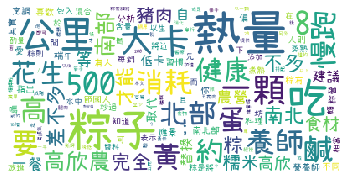

<Figure size 1200x800 with 0 Axes>

In [46]:
wc = WordCloud(font_path="setofont.ttf", #設置字體
               background_color="white", #背景顏色
               max_words = 2000,        #文字雲顯示最大詞數
               stopwords=stopwords)      #停用字詞
 
# 使用dictionary的內容產生文字雲
wc.generate_from_frequencies(hash)
 
# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(6,4), dpi =200)
plt.show()

# artDf = pd.DataFrame.from_dict(hash, orient='index', columns =['詞頻'])
# artDf.sort_values(by=['詞頻'], ascending= False)

In [1]:
#安裝情緒分析套件
#!pip install snownlp

  Running setup.py bdist_wheel for snownlp: started
  Running setup.py bdist_wheel for snownlp: finished with status 'done'
  Stored in directory: C:\Users\Jenny\AppData\Local\pip\Cache\wheels\f3\81\25\7c197493bd7daf177016f1a951c5c3a53b1c7e9339fd11ec8f
Successfully built snownlp


You are using pip version 9.0.1, however version 20.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [47]:
#情緒分析套件
from snownlp import SnowNLP

text = c
#text = d 
s = SnowNLP(text)

In [48]:
#劃分句子 計算分數
total1 = 0
total2 = 0
for sentence in s.sentences:
  print(sentence)
  print(SnowNLP(sentence).sentiments)
  count = SnowNLP(sentence).sentiments
  if count > 0.5:
    total1 = total1 + 1;
  else:
    total2 = total2 + 1;

print('正向句子數:',total1)
print('負向句子數:',total2)

每到端午節
0.1837233963534416
國人習慣吃粽子應景
0.8415628538255578
但你可知道粽子熱量有多高嗎
0.2919524797120989
有人喜歡吃北部粽
0.6103603136265272
有的人則偏愛南部粽
0.8732453086977698
營養師高欣農分析
0.9129294081423546
南北部粽子其實熱量差不多
0.634071078380999
吃一顆約500大卡
0.8192225458681677
要慢跑8公里才能完全消耗
0.1484728118790738
一顆粽子約500大卡
0.7711508877178357
營養師高欣農指出
0.7085643360352443
坊間南北粽的料理烹調不同
0.02143594988667019
但熱量差不多
0.48000410449309383
北部粽是將糯米炒過
0.15992915701464705
包入豬肉、鹹蛋黃、花生等蒸熟
0.0700300450520186
熱量約在500多大卡
0.33719166139962775
而南部粽則先以生糯米混合豬肉、花生、鹹蛋黃等食材
0.4368474112526268
再放進水中煮熟
0.14327070412348408
熱量也將近500大卡
0.4131640959891667
慢跑8公里才能消耗
0.1484728118790738
高欣農營養師表示
0.6030249181868265
吃下一顆粽子相當於一餐的熱量
0.5978013400967686
且鈉含量也頗高
0.5222711630227257
添加醬料應酌量
0.3156159798727679
建議一餐以一顆為限
0.6224147352784739
吃粽子應景、解饞即可
0.8830097246267784
若要完全消耗熱量
0.5193138830795896
必須騎自行車20公里
0.060745180604115157
或快走9公里
0.26389688676238254
或是慢跑8公里
0.22064918613827111
食材替換　自製健康低卡粽
0.5518538393563465
高欣農營養師提供低卡健康粽食譜
0.7626269096172613
將五花肉替換成豬後腿肉、栗子取代鹹蛋黃
0.0196974552501